## CIFAR10 Dataset - Convolutional Neural Network

### Importing Necessary Tools

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [2]:
# Check Tensorflow version
print(f"Tensorflow version is: {tf.__version__}")

Tensorflow version is: 2.3.0


In [3]:
# Check GPU availability
print("GPU", "is available" if tf.config.list_physical_devices("GPU") else "is not available")

GPU is available


### Get Data Ready
* CIFAR10 dataset

In [4]:
from tensorflow.keras.datasets import cifar10

In [5]:
(X, y), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [6]:
# Classes of data in CIFAR10 dataset
classes = ["airplane",
"automobile",
"bird",
"cat",
"deer",
"dog",
"frog",
"horse",
"ship",
"truck"]

In [7]:
# Create a function to check data according to it's shape (Training, validation or test)
def check_shape(X, y, valid_data = False, test_data = False):
  """
  Finds a shape of given data and returns.
  """
  if valid_data:
    print(f"Shape of validation images: {X.shape}")
    print(f"Shape of validation labels: {y.shape}")
  
  elif test_data:
    print(f"Shape of test images: {X.shape}")
    print(f"Shape of test labels: {y.shape}")

  else:
    print(f"Shape of training images: {X.shape}")
    print(f"Shape of training labels: {y.shape}")

In [8]:
check_shape(X, y)

Shape of training images: (50000, 32, 32, 3)
Shape of training labels: (50000, 1)


In [9]:
check_shape(X_test, y_test, test_data = True)

Shape of test images: (10000, 32, 32, 3)
Shape of test labels: (10000, 1)


In [10]:
y[0][0]

6

In [11]:
# Create a function to visualize some images
def show_25_images(images, labels):
  """
  Plots the given images and put the corresponding label to the under of image.
  """

  plt.figure(figsize = (7, 9))

  for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images[i])
    plt.xlabel(classes[labels[i][0]])
  
  plt.show();

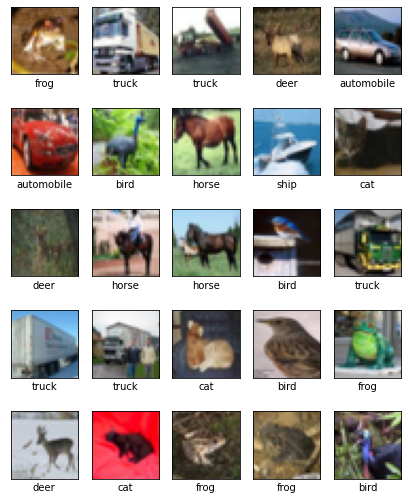

In [12]:
show_25_images(images = X,
               labels = y)

### Preprocessing of images and labels

In [13]:
# Normalize pixel values from 0-255 to 0-1
X = X.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [14]:
# Find number of classes
num_classes = len(np.unique(y))
num_classes

10

In [15]:
# One hot encoding labels
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, num_classes)
y_test = to_categorical(y_test, num_classes)

In [16]:
y[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [17]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [18]:
# Check shape again
check_shape(X, y)

Shape of training images: (50000, 32, 32, 3)
Shape of training labels: (50000, 10)


In [19]:
check_shape(X_test, y_test, test_data = True)

Shape of test images: (10000, 32, 32, 3)
Shape of test labels: (10000, 10)


### Creating Convolutional Neural Network Without Batching Methodology

In [20]:
X.shape[1:]

(32, 32, 3)

In [21]:
# Create a function to build and compile CNN model
def build_and_compile_model():
  """
  Builds a CNN model and compiles it. 
  """

  model = tf.keras.Sequential([
          tf.keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), padding = "same", activation = "relu", input_shape = (X.shape[1:])),
          tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
          tf.keras.layers.Dropout(rate = 0.2),

          
          tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), padding = "same", activation = "relu"),
          tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
          tf.keras.layers.Dropout(rate = 0.2),

          
          tf.keras.layers.Conv2D(filters = 128, kernel_size = (3, 3), padding = "same", activation = "relu"),
          tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
          tf.keras.layers.Dropout(rate = 0.2),

          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(128, activation = "relu"),
          tf.keras.layers.Dropout(rate = 0.2),
          tf.keras.layers.Dense(units = num_classes, activation = "softmax")
  ])

  # Compile model
  model.compile(
      optimizer = tf.keras.optimizers.Adam(),
      loss = tf.keras.losses.CategoricalCrossentropy(),
      metrics = ["accuracy"]
  )

  # Return the model
  return model

In [22]:
model = build_and_compile_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         7

In [23]:
# Create a EarlyStopping callback to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy",
                                                  patience = 3)

### Creating our own validation set

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,
                                                  y,
                                                  test_size = 0.2)

In [25]:
check_shape(X_val, y_val, valid_data = True)

Shape of validation images: (10000, 32, 32, 3)
Shape of validation labels: (10000, 10)


### Fit the model to the data

In [26]:
history = model.fit(x = X_train,
                    y = y_train,
                    batch_size = 32,
                    epochs = 100,
                    callbacks = [early_stopping],
                    validation_data = (X_val, y_val))

Epoch 1/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6283 - accuracy: 0.4014 - val_loss: 1.3583 - val_accuracy: 0.5191
Epoch 2/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2442 - accuracy: 0.5574 - val_loss: 1.0972 - val_accuracy: 0.6125
Epoch 3/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0904 - accuracy: 0.6148 - val_loss: 1.0418 - val_accuracy: 0.6332
Epoch 4/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0010 - accuracy: 0.6485 - val_loss: 0.9119 - val_accuracy: 0.6800
Epoch 5/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9263 - accuracy: 0.6721 - val_loss: 0.8428 - val_accuracy: 0.7019
Epoch 6/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8788 - accuracy: 0.6903 - val_loss: 0.8222 - val_accuracy: 0.7085
Epoch 7/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8365 - accuracy: 0.7059 - val_loss: 0.7966 - val_ac

In [27]:
score = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.7540 - accuracy: 0.7381


In [28]:
# Create a function to plot history of fitting operation
def plot_history(history):
  """
  Plots the given history.
  """

  fig, (ax0, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (9, 7))

  ax0.plot(history.history["accuracy"], color = "blue", label = "Training Accuracy")
  ax0.plot(history.history["val_accuracy"], color = "salmon", label = "Validation Accuracy")
  ax0.set_title("Training/Validation Accuracy")
  ax0.legend()

  ax1.plot(history.history["loss"], color = "blue", label = "Training Loss")
  ax1.plot(history.history["val_loss"], color = "salmon", label = "Validation Loss")
  ax1.set_title("Training/Validation Loss")
  ax1.legend();

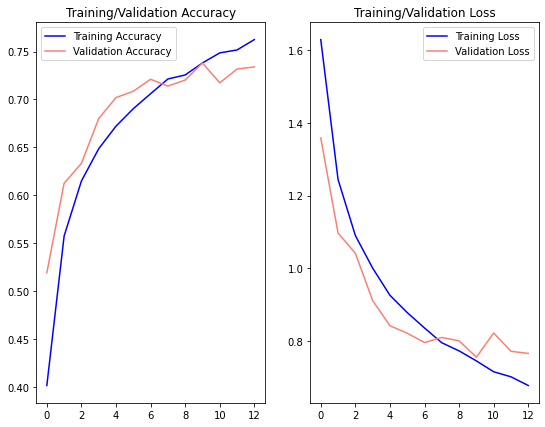

In [29]:
plot_history(history = history)

### Making prediction on the test data

In [30]:
preds = model.predict(X_test)
preds

array([[2.64183665e-03, 2.52231886e-03, 1.25231147e-02, ...,
        3.95929645e-04, 2.66264961e-03, 2.73819803e-03],
       [5.32981358e-04, 1.74903587e-01, 3.53904875e-06, ...,
        1.71448065e-08, 8.23687911e-01, 8.70428805e-04],
       [1.80118099e-01, 2.30731685e-02, 8.52587540e-03, ...,
        4.90295142e-03, 7.55850852e-01, 1.93031654e-02],
       ...,
       [3.52406914e-06, 1.23224822e-07, 1.17481975e-02, ...,
        1.06918486e-02, 2.46086324e-06, 2.27457872e-06],
       [7.58969635e-02, 7.33285606e-01, 4.69003208e-02, ...,
        8.79329536e-03, 2.29469296e-02, 2.95438711e-03],
       [8.81046446e-07, 1.17826271e-09, 6.76624331e-05, ...,
        9.54576552e-01, 1.37647360e-08, 1.06289333e-09]], dtype=float32)

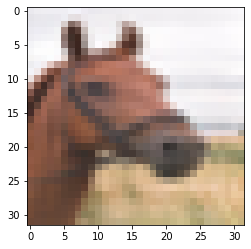

In [31]:
plt.imshow(X_test[99]);

In [32]:
classes[np.argmax(y_test[99])]

'horse'

In [33]:
classes[np.argmax(preds[99])]

'horse'

### Visualizing predictions

In [85]:
# Create a function to visualize predictions
def show_predictions(images, labels, y_preds):
  """
  Plots the image, shows the predicted label and truth label.
  """

  plt.figure(figsize = (13, 17))

  for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images[i])
    predicted_label = classes[np.argmax(y_preds[i])]
    truth_label = classes[np.argmax(labels[i])]

    if predicted_label == truth_label:
      color = "green"
    else:
      color = "red"
    
    plt.xlabel(truth_label + " --> " + predicted_label, color = color)
  
  plt.show();

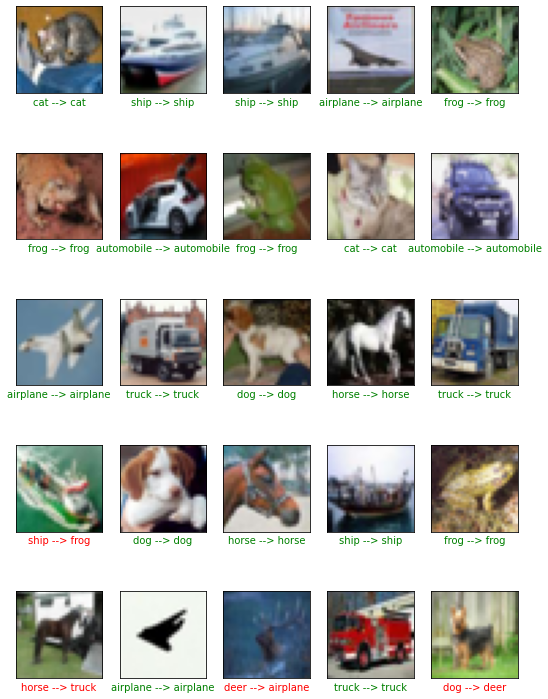

In [35]:
show_predictions(images = X_test,
                 labels = y_test,
                 y_preds = preds)

### Creating a Convolutional Neural Network With Batching Methodology

#### Creating Data Batches

In [36]:
# Initialize the batch size
BATCH_SIZE = 32
# Create a function to batch the data as training, validation and test
def create_data_batches(X, y, batch_size = BATCH_SIZE, validation_data = False, test_data = False):
  """
  Creates training, validation or data batch according to given data.
  """

  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    data_batch = data.batch(batch_size)
    return data_batch
  
  elif validation_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    data_batch = data.batch(batch_size)
    return data_batch

  else:
    print("Creating training data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    data_batch = data.shuffle(buffer_size = len(X)).batch(batch_size)
    return data_batch

In [37]:
# Create training & validation data batches
training_batch = create_data_batches(X_train, y_train)
validation_batch = create_data_batches(X_val, y_val, validation_data = True)

Creating training data batches...
Creating validation data batches...


In [38]:
# Check specification of data batches
training_batch.element_spec, validation_batch.element_spec

((TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)),
 (TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)))

#### Visualizing Data Batches
* First thing we need to do : A function to unbatch the data batches
* Second thing we need to do: A function to visualize data batches

In [39]:
# Create a function to unbatch the data batches
def unbatchify(data_batch):
  """
  Unbatches the data batch and return (images, labels) pair.
  """

  images, labels = next(data_batch.unbatch().as_numpy_iterator())

  return images, labels

In [40]:
# Unbatch training data batch
training_images, training_labels = unbatchify(data_batch = training_batch)

In [43]:
# Check images and labels
training_images[0]

array([[0.28627452, 0.34901962, 0.3372549 ],
       [0.28235295, 0.3372549 , 0.31764707],
       [0.29803923, 0.34509805, 0.3254902 ],
       [0.32941177, 0.37254903, 0.34509805],
       [0.31764707, 0.3647059 , 0.3372549 ],
       [0.29411766, 0.34117648, 0.3137255 ],
       [0.29411766, 0.3372549 , 0.3137255 ],
       [0.30980393, 0.3529412 , 0.32941177],
       [0.3254902 , 0.36862746, 0.34509805],
       [0.3372549 , 0.38039216, 0.35686275],
       [0.38431373, 0.41960785, 0.4       ],
       [0.3882353 , 0.42352942, 0.40392157],
       [0.4117647 , 0.44705883, 0.42745098],
       [0.40784314, 0.44313726, 0.42352942],
       [0.3764706 , 0.4117647 , 0.3882353 ],
       [0.34901962, 0.38431373, 0.34901962],
       [0.3372549 , 0.3764706 , 0.33333334],
       [0.35686275, 0.4       , 0.36078432],
       [0.32941177, 0.3764706 , 0.34117648],
       [0.28627452, 0.34509805, 0.3137255 ],
       [0.3019608 , 0.3529412 , 0.33333334],
       [0.3372549 , 0.36862746, 0.36078432],
       [0.

In [45]:
training_images.shape

(32, 32, 3)

In [84]:
# Create a function to visualize data batch
def visualize_data_batch(images, labels):

  plt.figure(figsize = (7, 9))

  size = len(images)
  nrows = 4
  ncols = size / nrows
  
  for i in range(size):
    plt.subplot(nrows, ncols, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow((images[i]))
    #plt.xlabel(classes[np.argmax(labels[i])])
  plt.show();

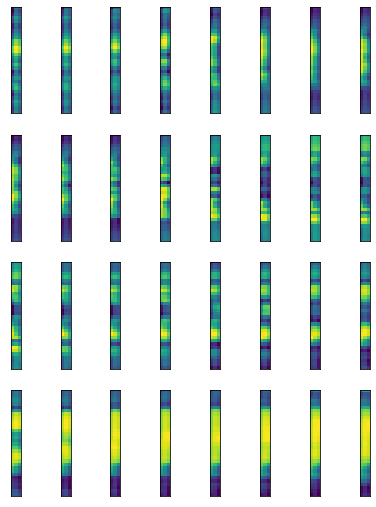

In [54]:
visualize_data_batch(images = training_images,
                     labels = training_labels)

In [55]:
# Create a model
model_batch = build_and_compile_model()
# Check model summary
model_batch.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 128)        

In [56]:
# Fit the model to the data
NUM_EPOCH = 100

history_batch = model_batch.fit(training_batch,
                                epochs = NUM_EPOCH,
                                verbose = True,
                                callbacks = [early_stopping],
                                validation_data = validation_batch)

Epoch 1/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.6420 - accuracy: 0.3995 - val_loss: 1.2427 - val_accuracy: 0.5525
Epoch 2/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2398 - accuracy: 0.5555 - val_loss: 1.1186 - val_accuracy: 0.6012
Epoch 3/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0903 - accuracy: 0.6136 - val_loss: 0.9967 - val_accuracy: 0.6414
Epoch 4/100
1250/1250 [==============================] - 6s 4ms/step - loss: 1.0042 - accuracy: 0.6453 - val_loss: 0.9224 - val_accuracy: 0.6724
Epoch 5/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9381 - accuracy: 0.6689 - val_loss: 0.8556 - val_accuracy: 0.6973
Epoch 6/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8762 - accuracy: 0.6919 - val_loss: 0.8129 - val_accuracy: 0.7100
Epoch 7/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8322 - accuracy: 0.7074 - val_loss: 0.8579 - val_ac

In [57]:
# Create test data batches to make predictions
test_batch = create_data_batches(X_test, y_test, test_data = True)

Creating test data batches...


In [58]:
test_batch.element_spec

(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))

In [59]:
batch_preds = model_batch.predict(test_batch)

In [74]:
batch_preds[0]

array([9.2803757e-04, 1.1142181e-04, 2.5990102e-03, 7.9871303e-01,
       2.2304999e-03, 1.8066154e-01, 1.1294961e-02, 2.4955627e-03,
       3.3652558e-04, 6.2938058e-04], dtype=float32)

In [75]:
classes[np.argmax(batch_preds[0])]

'cat'

In [76]:
classes[np.argmax(test_labels[0])]

'airplane'

In [78]:
# Unbatch the test data batches
test_images, test_labels = unbatchify(data_batch = test_batch)

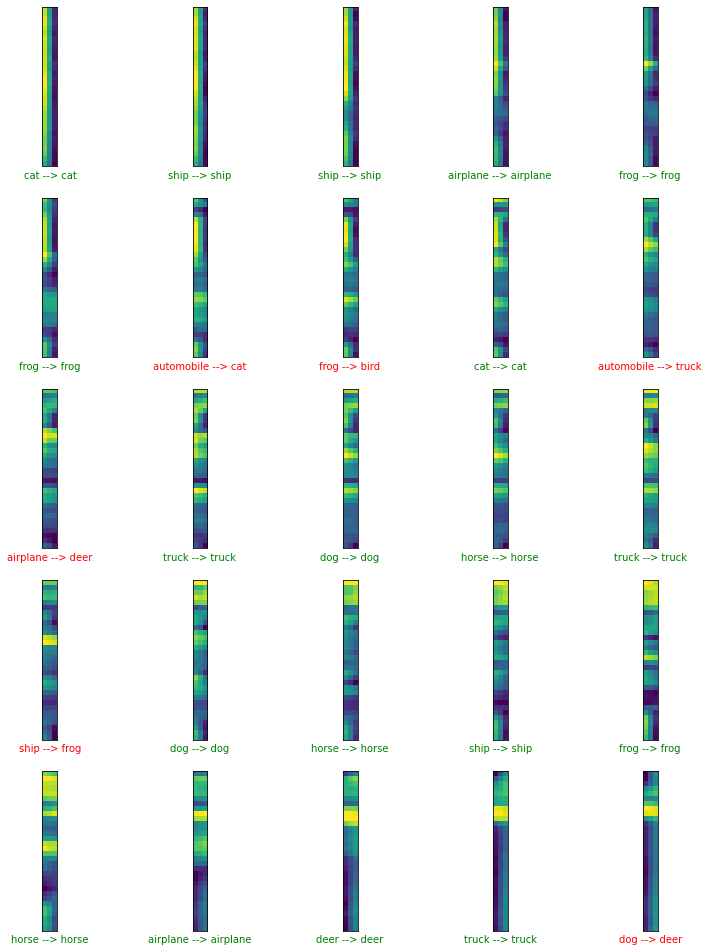

In [86]:
# Visualize the predictions
show_predictions(images = test_images,
                 labels = y_test,
                 y_preds = batch_preds)

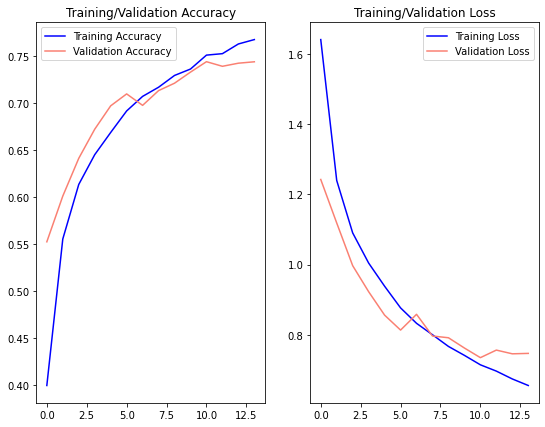

In [82]:
# Check the history of fitting operation - with batch methodology
plot_history(history = history_batch)

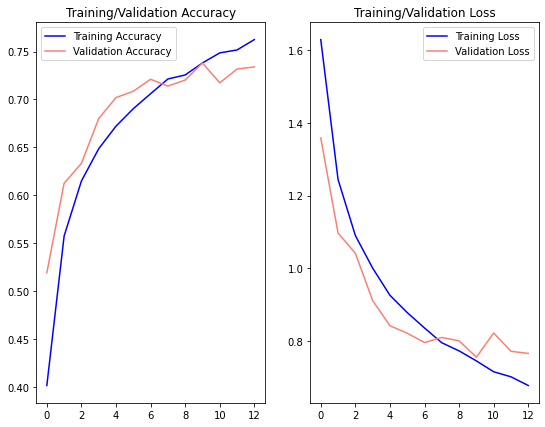

In [83]:
# Check the history of fitting operation - without batch methodology
plot_history(history = history)

### Trying Transfer Learning Model

In [101]:
# Create a function to resize our images
def resize(X, y):
  X = tf.image.resize(X, size = [224, 224])
  return X, y

In [102]:
# Initialize the batch size
BATCH_SIZE = 32
# Create a function to batch the data as training, validation and test
def create_data_batches_for_transfer(X, y, batch_size = BATCH_SIZE, validation_data = False, test_data = False):
  """
  Creates training, validation or data batch according to given data.
  """

  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    data_batch = data.map(resize).batch(batch_size)
    return data_batch
  
  elif validation_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    data_batch = data.map(resize).batch(batch_size)
    return data_batch

  else:
    print("Creating training data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    data_batch = data.shuffle(buffer_size = len(X)).map(resize).batch(batch_size)
    return data_batch

In [103]:
# Create new data batches
training_batch_transfer = create_data_batches_for_transfer(X_train, y_train)
validation_batch_transfer = create_data_batches_for_transfer(X_val, y_val, validation_data = True)

Creating training data batches...
Creating validation data batches...


In [104]:
training_batch_transfer.element_spec, validation_batch_transfer.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)))

In [105]:
# Import TensorflowHub
import tensorflow_hub as hub
# Check TensorflowHub version
print(f"TensorflowHub version: {hub.__version__}")

TensorflowHub version: 0.9.0


In [106]:
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"
INPUT_SHAPE = [None, 224, 224, 3]
OUTPUT_SHAPE = num_classes

In [113]:
# Create a function to build transfer learning model
def build_transfer_learning_model(model_url = MODEL_URL, input_shape = INPUT_SHAPE, output_shape = OUTPUT_SHAPE):

  print(f"Creating transfer learning model with: {model_url}")
  model = tf.keras.Sequential([
          hub.KerasLayer(model_url), # Input Layer
          tf.keras.layers.Dense(units = output_shape, activation = "softmax") # Output Layer
  ])

  # Compile transfer learning model
  model.compile(
      optimizer = tf.keras.optimizers.Adam(),
      loss = tf.keras.losses.CategoricalCrossentropy(),
      metrics = ["accuracy"]
  )
  # Build model
  model.build(input_shape = input_shape)

  # Return model
  return model

In [114]:
transfer_learning_model = build_transfer_learning_model()

Creating transfer learning model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [115]:
transfer_learning_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_3 (KerasLayer)   (None, 1001)              5432713   
_________________________________________________________________
dense_7 (Dense)              (None, 10)                10020     
Total params: 5,442,733
Trainable params: 10,020
Non-trainable params: 5,432,713
_________________________________________________________________


In [116]:
# Fit the model to the data
history_transfer = transfer_learning_model.fit(training_batch_transfer,
                                               epochs = 100,
                                               callbacks = [early_stopping],
                                               validation_data = validation_batch_transfer)

Epoch 1/100
1250/1250 [==============================] - 73s 58ms/step - loss: 0.5442 - accuracy: 0.8176 - val_loss: 0.4616 - val_accuracy: 0.8460
Epoch 2/100
1250/1250 [==============================] - 98s 79ms/step - loss: 0.4221 - accuracy: 0.8576 - val_loss: 0.4554 - val_accuracy: 0.8569
Epoch 3/100
1250/1250 [==============================] - 98s 78ms/step - loss: 0.4018 - accuracy: 0.8643 - val_loss: 0.4642 - val_accuracy: 0.8476
Epoch 4/100
1250/1250 [==============================] - 72s 57ms/step - loss: 0.3947 - accuracy: 0.8673 - val_loss: 0.4457 - val_accuracy: 0.8524
Epoch 5/100
1250/1250 [==============================] - 72s 57ms/step - loss: 0.3824 - accuracy: 0.8721 - val_loss: 0.4588 - val_accuracy: 0.8527


In [117]:
# Create test data batches to make predictions
test_batch_transfer = create_data_batches_for_transfer(X_test, y_test, test_data = True)

Creating test data batches...


In [118]:
test_batch_transfer.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))

In [119]:
preds_transfer = transfer_learning_model.predict(test_batch_transfer)

In [120]:
preds_transfer

array([[1.9038206e-03, 5.7317439e-04, 3.8975902e-02, ..., 6.4153783e-03,
        1.1858093e-03, 1.8349521e-05],
       [1.6140189e-02, 1.9908161e-03, 2.8943168e-07, ..., 6.3354300e-08,
        9.8183823e-01, 3.0147443e-05],
       [4.8641245e-06, 2.1387523e-03, 2.2673689e-08, ..., 2.4418419e-05,
        9.9772686e-01, 1.0515641e-05],
       ...,
       [9.1381349e-07, 3.7396612e-07, 2.4362878e-04, ..., 8.7951179e-05,
        2.6268417e-06, 1.9313206e-06],
       [2.4597540e-02, 9.6067792e-01, 8.5008116e-03, ..., 6.2385548e-06,
        2.5172832e-03, 2.5023557e-03],
       [2.5694810e-06, 4.4648968e-07, 1.8993536e-05, ..., 9.9761248e-01,
        1.2885750e-05, 2.1902977e-05]], dtype=float32)

In [121]:
# Unbatch the test data batches
test_images_transfer, test_labels_transfer = unbatchify(data_batch = test_batch_transfer)

In [122]:
test_images_transfer.shape

(224, 224, 3)

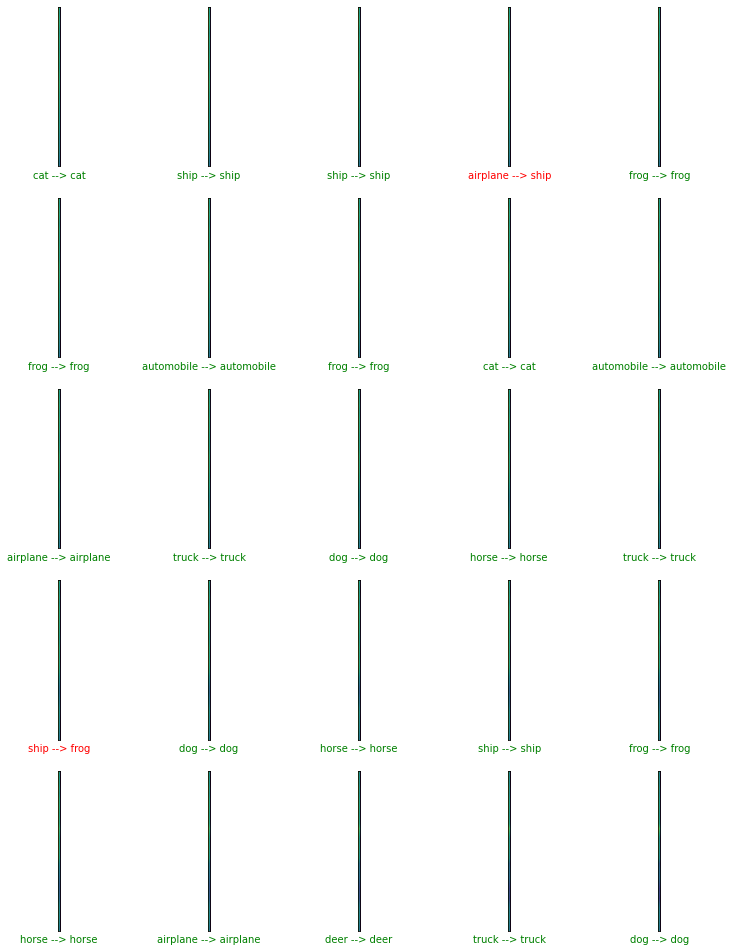

In [123]:
show_predictions(images = test_images_transfer,
                 labels = y_test,
                 y_preds = preds_transfer)